In [ ]:
import os 
os.getcwd()

>>> Load Data
- ./IRAS15193+31_H2O_181210.txt
- ./IRAS15193+31_H2O_181204.txt
- ./IRAS15193+31_H2O_190527.txt
- ./IRAS15193+31_H2O_190122.txt
- ./IRAS15193+31_H2O_190108.txt
- ./IRAS15193+31_H2O_181213.txt
- ./IRAS15193+31_H2O_181206.txt
- ./IRAS15193+31_H2O_181202.txt
- ./IRAS15193+31_H2O_181215.txt
- ./IRAS15193+31_H2O_181201.txt
- ./IRAS15193+31_H2O_181214.txt
- ./IRAS15193+31_H2O_181228.txt
- ./IRAS15193+31_H2O_190220.txt
- ./IRAS15193+31_H2O_190208.txt
- ./IRAS15193+31_H2O_190202.txt
- ./IRAS15193+31_H2O_190216.txt
- ./IRAS15193+31_H2O_190204.txt
- ./IRAS15193+31_H2O_190212.txt
- ./IRAS15193+31_H2O_190116.txt
- ./IRAS15193+31_H2O_181231.txt
- ./IRAS15193+31_H2O_190513.txt
- ./IRAS15193+31_H2O_190303.txt
- ./IRAS15193+31_H2O_190104.txt
- ./IRAS15193+31_H2O_190514.txt
- ./IRAS15193+31_H2O_181222.txt
- ./IRAS15193+31_H2O_181220.txt


<IPython.core.display.Javascript object>


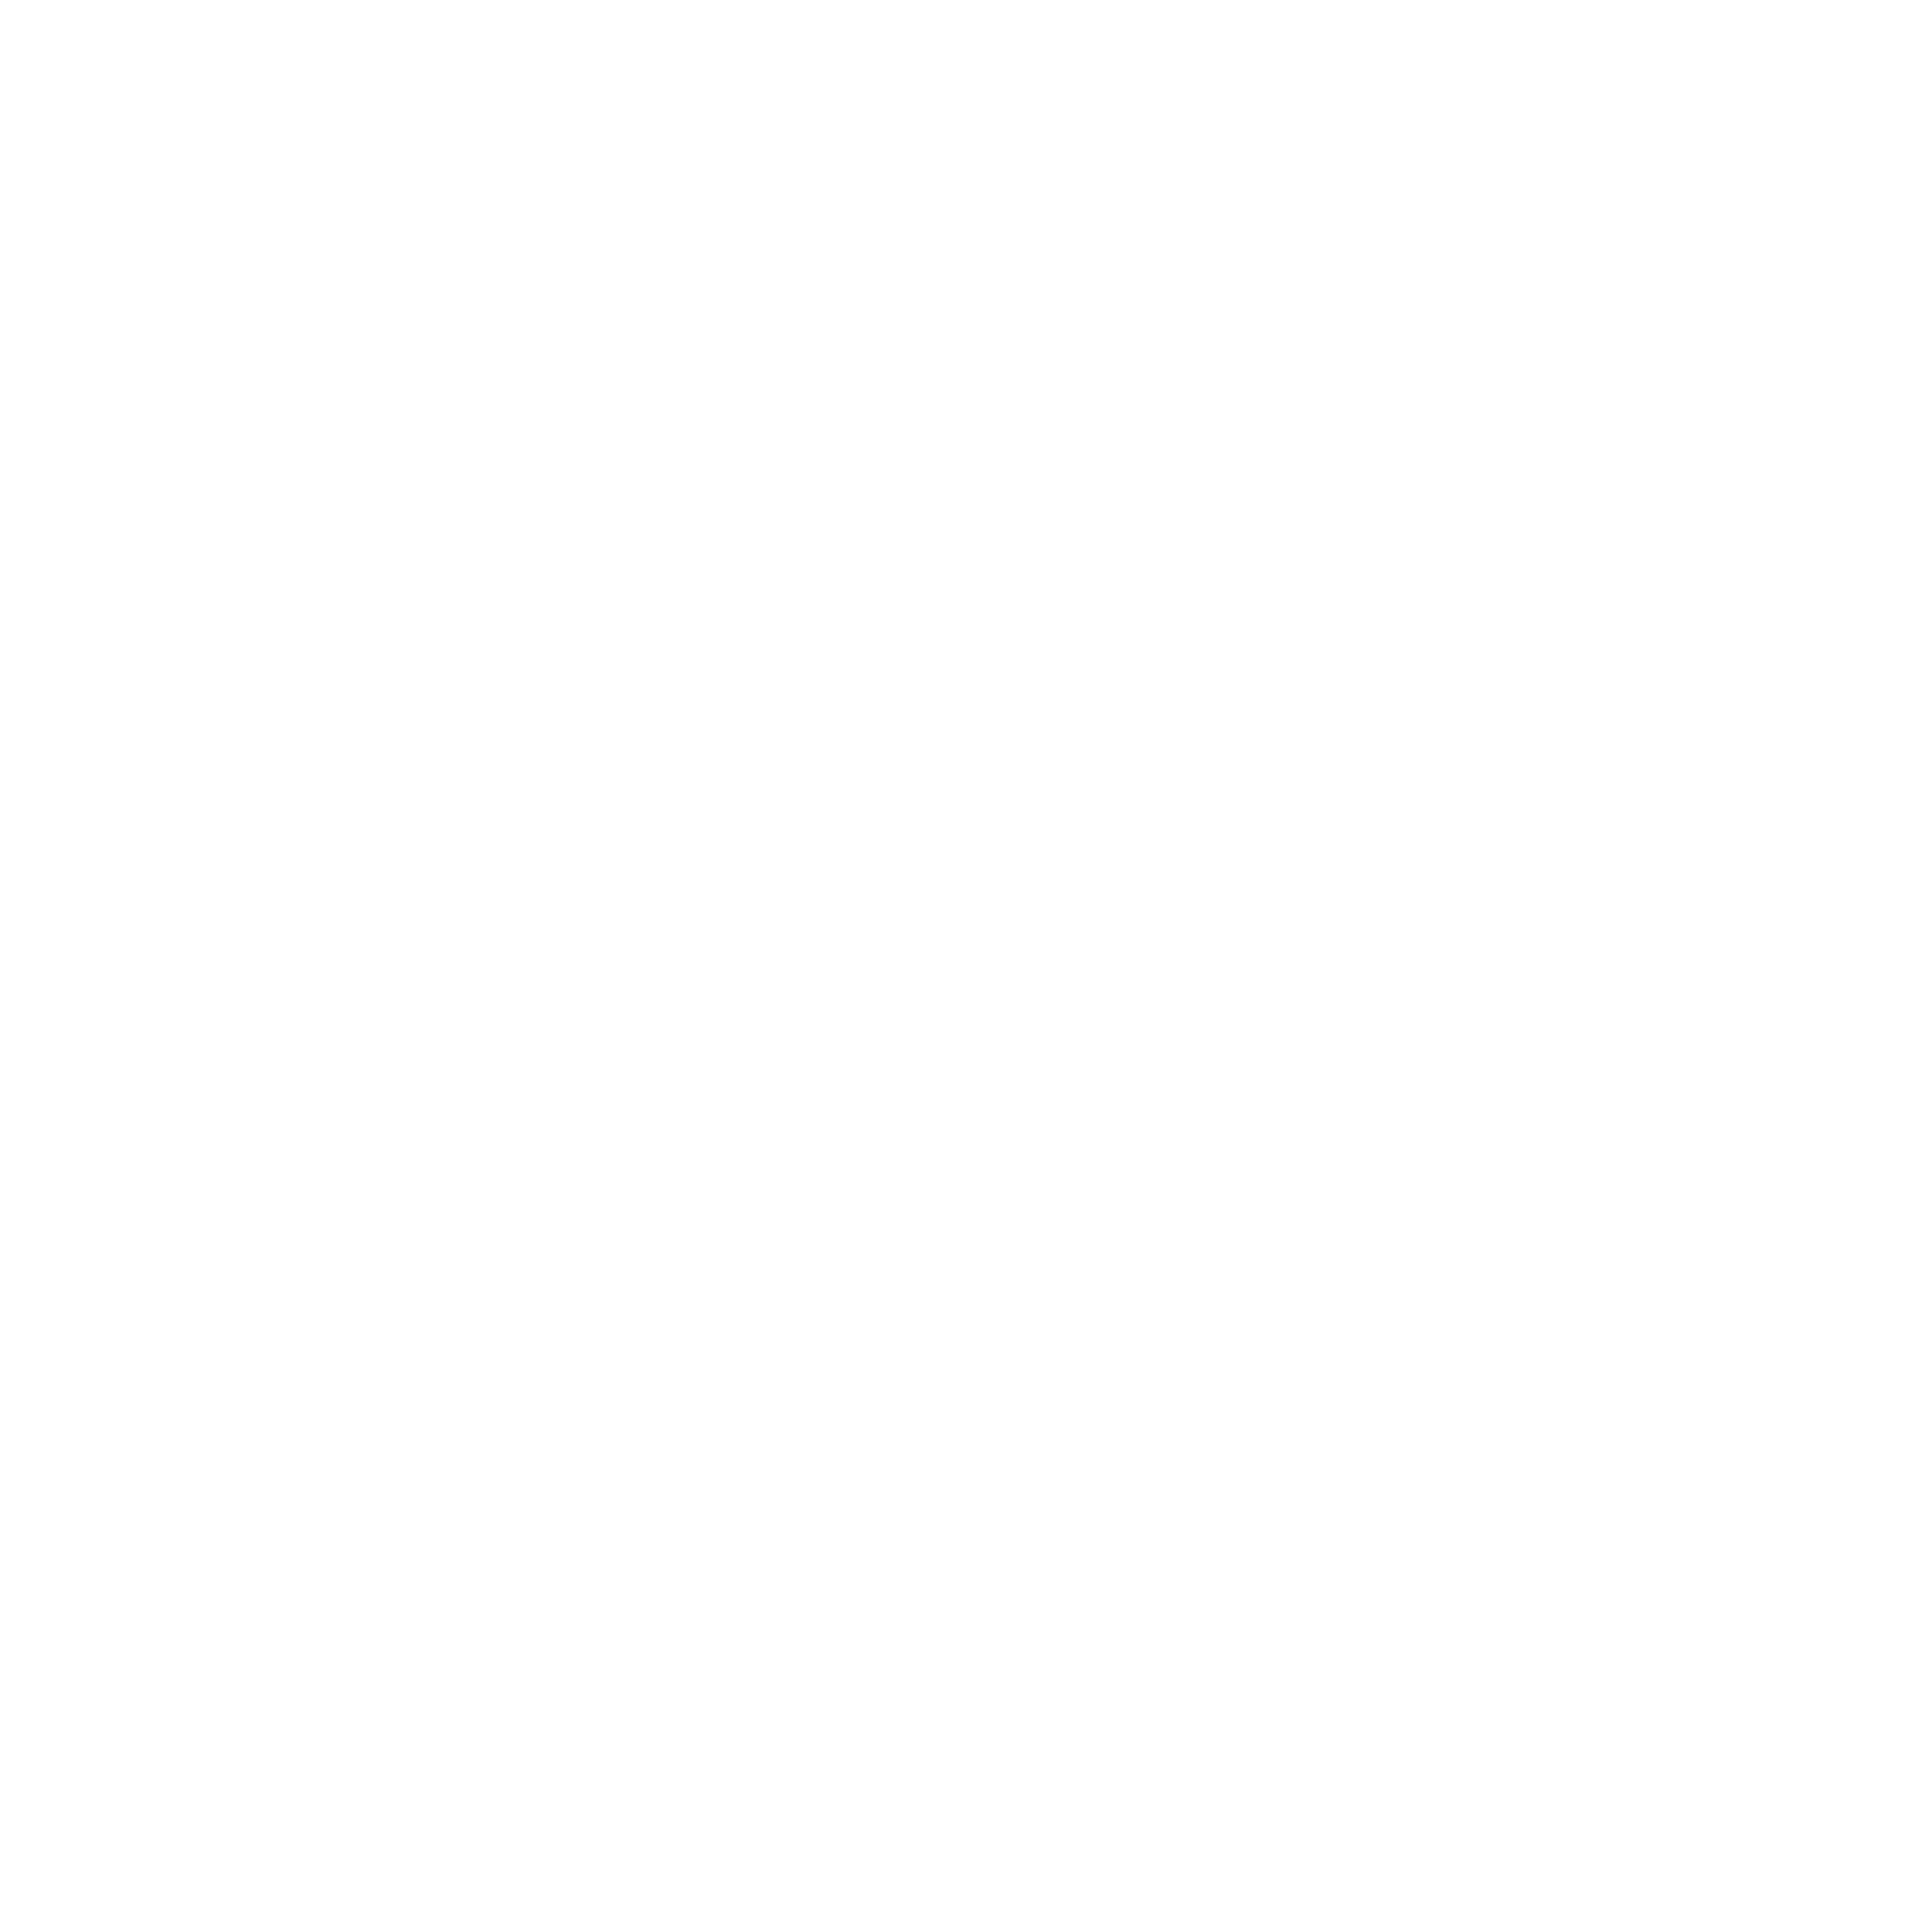

<IPython.core.display.Javascript object>


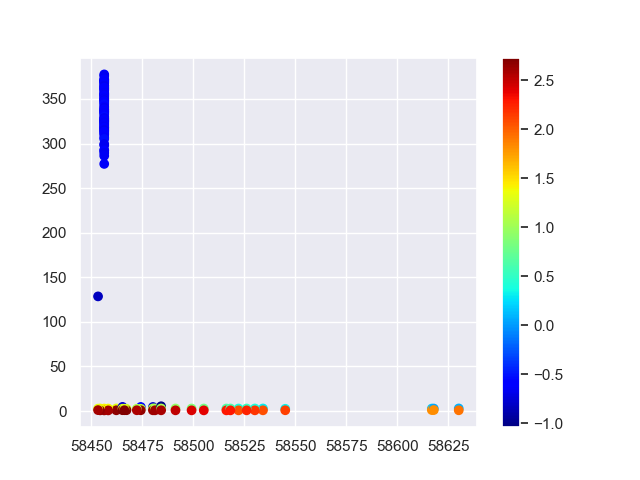

KeyboardInterrupt: 

In [33]:
import numpy as np
import matplotlib as plt

%matplotlib notebook

import os

import TrackFreq
os.chdir("/Users/yhamae/OneDrive/astro/FLASHING/peak/")


# Python3 TrackFreq.py IRAS15193+31 H2O /Users/yhamae/OneDrive/astro/FLASHING/peak/ /Users/yhamae/OneDrive/astro/FLASHING/dynamic_spectrum/IRAS15193+31_H20.txt -sin

# args = sys.argv
tf = TrackFreq.TrackingFrequently()

tf.source = "RAS15193+31"  # 天体名
tf.ref_freq = "H2O"  # 分子名（H2O,SiOなど）
tf.directory = os.path.join("./")  # ファイルを検索するディレクトリ
tf.oname = os.path.join("/Users/yhamae/OneDrive/astro/FLASHING/dynamic_spectrum/IRAS15193+31_H20.txt")  # 書き出すテキストファイルの名前
tf.source_keywoed = tf.source + "_" + tf.ref_freq + "_"
result1 = tf.get_peak_data()

if False:  # 最後に-aをつけると計算モード
    result2 = tf.analysis_peak()
if True:
    result2 = tf.sin_fitting()
if False:  # 
    cal = CalVariation()
    data_key = list(tf.data_index.keys())
    data_key.sort()

    print(data_key)

    # splot = plt.figure(figsize=(20,20))

    for i in range(0, len(data_key) - 1):
        cal = CalVariation()
        max_channel = 2048
        range_pm = 15
        range_max = range_pm
        range_min = -1 * range_pm
        a = [0] * max_channel
        b = [0] * max_channel
        x = [0] * (range_max - range_min + 1)
        y = [0] * (range_max - range_min + 1)
        # ut.chkprint(len(tf.rawdata))
        for j in range(0, len(tf.rawdata)):
            # index_num = 
            if int(tf.rawdata[j][1]) < max_channel:
                # if int(tf.rawdata[j][1]) <= 1122:
                if int(tf.rawdata[j][2]) >= 0:
                    tmp = int(tf.rawdata[j][1])
                else:
                    tmp = 2048 - int(tf.rawdata[j][1])
                if float(tf.rawdata[j][0]) == float(data_key[i]):
                    # print("!")
                    # ut.chkprint(tf.rawdata[i][3])
                    a[tmp] += float(tf.rawdata[j][3])
                    a[int(tf.rawdata[j][1])] = 1
                if float(tf.rawdata[j][0]) == float(data_key[i + 1]):
                    # ut.chkprint(tf.rawdata[i][3])
                    b[tmp] += float(tf.rawdata[j][3])
                    b[int(tf.rawdata[j][1])] = 1
        # ut.chkprint(a, b)
        # print("date", end = ": ")
        # print((float(data_key[i + 1]) - float(data_key[i])))
        d = cal.minimum_difference(a, b, (float(data_key[i + 1]) - float(data_key[i])), range_min, range_max)
        delta_x = float(data_key[i + 1]) - float(data_key[i])
        # plt.figure()

        # ax = splot.add_subplot(len(data_key), 1, i + 1)

        # ax = splot.add_subplot(2, 1, 1)


        # sns.lineplot(x = [cal.data[i][0]for i in range(0, len(cal.data))], y =  [cal.data[i][1] for i in range(0, len(cal.data))], ax = ax)




        ut.chkprint(delta_x)
        plt.plot([cal.data[i][0]for i in range(0, len(cal.data))], [cal.data[i][1] for i in range(0, len(cal.data))])
        plt.title(data_key[i] + ' --> ' + data_key[i + 1])
        plt.grid(which='major',color='black',linestyle='-')
        plt.grid(which='minor',color='black',linestyle='-')
        plt.show()

        for k in range(0, len(cal.data)):
            y[k] += cal.data[k][1] * 365.25 / delta_x
            x[k] = cal.data[k][0]
        for k in range(0, (range_max - range_min + 1)):
            if  y[k] == 0 and x[k] == 0:
                x.pop(k)
                y.pop(k)


        ut.chkprint(d)


    # plt.show()
    # ax = splot.add_subplot(len(data_key), 1, len(data_key))
    # ax = splot.add_subplot(2, 1, 2)
    # sns.lineplot(x = x, y = y, ax = ax)

    plt.plot(x, y)
    plt.grid(which='major',color='black',linestyle='-')
    plt.grid(which='minor',color='black',linestyle='-')
    plt.title('all')
    plt.legend()
    plt.show()




    result2 = True
else:
    result2 = True
